# Ensemble Methods

## Majority Voting

[<img src="https://www.researchgate.net/publication/324014302/figure/fig2/AS:644424015040514@1530654066950/Majority-voting-algorithm.png">](https://www.researchgate.net/publication/324014302/figure/fig2/AS:644424015040514@1530654066950/Majority-voting-algorithm.png)

$$ P_f = mode\{C_1(x), C_2(x), .. C_m(x)\}$$  where  $C_i(x) = P_i$

### Why Majority Vote?
- assume $m$ independent classifiers with base error rate $\epsilon$ 
- *independent* means errors are not correlated
- assume binary classification 
- assume the error rate is better than random guessing < 0.5
- $\forall \epsilon_i \in \{\epsilon_1, \epsilon_2, .. \epsilon_m\}, \epsilon_i < 0.5 $ 

The probability that we make a wrong prediction via the ensemble if $k$ classifiers predict the same class label (pmf of a binomial distribution).

$$ P(k) = \frac{m!}{(m-k)!k!} \epsilon^k (1-\epsilon)^{m-k} $$ 

Ensemble Error: Cumulative probability distribution

$$ \epsilon_{ens} = \sum_k^m \frac{m!}{(m-k)!k!} \epsilon^k (1-\epsilon)^{m-k} $$

### Soft Voting

$$ \hat{y} = argmax_j \sum_{i=1}^m w_i p_{i,j}$$

where 

- $w_i$ is an optional weighing parameter $w_i = \frac{1}{m}, \quad$  $\forall w_i \in \{w_1,...w_m\} $

- $p_{i,j}$ is the predicted class membership probability of the $i{th}$ classifier for class label $j$.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
iris = datasets.load_iris()
X, y = iris.data[:, [0, 1, 2, 3]], iris.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train/Valid/Test sizes:', y_train.shape[0], y_val.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 84 28 38


In [3]:
clf1 = DecisionTreeClassifier(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1, max_depth=1)
clf3 = DecisionTreeClassifier(random_state=1, max_depth=3)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1, 1, 1])

labels = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    clf.fit(X_train, y_train)
    print("Validation Accuracy: %0.2f [%s]" % (clf.score(X_val, y_val), label))
    
print("Test Accuracy: %0.2f" % eclf.score(X_test, y_test))

Validation Accuracy: 0.96 [Classifier 1]
Validation Accuracy: 0.82 [Classifier 2]
Validation Accuracy: 1.00 [Classifier 3]
Validation Accuracy: 1.00 [Ensemble]
Test Accuracy: 0.97


In [4]:
clf1 = DecisionTreeClassifier(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1, max_depth=1)
clf3 = DecisionTreeClassifier(random_state=1, max_depth=3)
eclf = VotingClassifier(estimators=[('dt1', clf1), ('dt2', clf2), ('dt3', clf3)], weights=[1,1,1])

labels = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    clf.fit(X_train, y_train)
    print("Validation Accuracy: %0.2f [%s]" % (clf.score(X_val, y_val), label))
    
print("Test Accuracy: %0.2f" % eclf.score(X_test, y_test))

Validation Accuracy: 0.96 [Classifier 1]
Validation Accuracy: 0.82 [Classifier 2]
Validation Accuracy: 1.00 [Classifier 3]
Validation Accuracy: 1.00 [Ensemble]
Test Accuracy: 0.97


# Bagging (Bootstrap Aggregating)

Let m be the number of bootstrap samples

**for** $i=1$ to $m$ **do**:
- Draw bootstrap sample of size $n$, $D_i$
- Train base classifier $C_i$ on $D_i$

$$ P_f = mode\{C_1(x), C_2(x), .. C_n(x)\}$$  where  $C_i(x) = P_i$

**Bootstrap sampling** 

Drawing data points from the dataset with replacement until we reach the $n$ training set size. "Replacement" means that some records will be duplicated in the bootstrap dataset. Each datapoint is drawn independently from the training set by randomly sampling with a uniform distribution ($\frac{1}{n}$ training set size).

This is a way of enforcing **complexity control** and is often an alternative to cross-validation. 

The records that are not chosen are referred to as the OOB (out of bag) samples. 

$$ P(not\_chosen) = \Bigg(1-\frac{1}{n}\Bigg)^n $$

$$ n \to \infty \quad P(not\_chosen) = \frac{1}{e} \approx 0.368 $$

$$ P(chosen) = 1 - \Bigg(1-\frac{1}{n}\Bigg)^n \approx 0.632 $$

i.e. only 63.2% of the bootstrap sample is unique.

> - The classifier $C_i$ are usually unpruned, deep decision trees.
> - The step of computing $m$ bootstrap samples and their respective decision trees & predictions can be PARALLELISED (n_jobs parameter in sklearn) 

[<img src="https://www.oreilly.com/library/view/python-machine-learning/9781787125933/graphics/B07030_07_06.jpg">](https://www.oreilly.com/library/view/python-machine-learning/9781787125933/graphics/B07030_07_06.jpg)

### Bias-Variance trade-off 

$$Loss = Bias + Variance + Noise $$

> - Best case scenario: **Low bias & Low Variance**
- Overfitting: **Low Bias & High Variance** 
- Underfitting: **High Bias & Low Variance** 
- Worst case scenario: **High bias & High Variance**


Typically, over-fitting arises as a result of the bias-variance trade off with over-fitted models suffering from a high variance error (highly sensitive to changes in training data) and a low bias error (few assumptions are made about underlying data). This would make the model too complex and specific to the features in the training data set, fitting their random noise.

<img src="https://miro.medium.com/max/978/1*CgIdnlB6JK8orFKPXpc7Rg.png" alt="biasv" width="600"/>
<table><tr>
<td> <img src="http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp_files/high-bias-plot.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp_files/varianceplot.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

The high-variance plot above shows different unpruned decision tree models, each fit to a different bootstrapped training set. It is evident that these hypotheses fit the training data very closely and the variance is very high, since on average, a prediction differs a lot from the expectation value of the prediction. 

However, if we would consider the expectation over training sets, the average hypothesis would fit the true function perfectly (given that the noise is unbiased and has an expected value of 0).  

> An individual, unpruned decision tree will “have high variance”. Averaging such high variance models will actually result in good predictions. A bagging model has a lower variance than the individual trees and therefore is less prone to overfitting.

### Mathematical Aside: Formal definition of Bias-Variance trade off

Assume we have a point estimator $\hat{\theta}$ of some parameter or function $\theta$. Then, the bias is commonly defined as the difference between the expected value of the estimator and the parameter that we want to estimate:

$$ Bias = E[\hat{\theta}] - \theta $$

If the bias is larger than zero, we can say that the estimator is positively biased, if the bias is smaller than zero, the estimator is negatively biased, and if the bias is exactly zero, the estimator is unbiased. 

Similarly, we define the variance as the difference between the expected value of the squared estimator minus the squared expectation of the estimator:

$$ Var(\hat{\theta}) = E[\hat{\theta}^2] - \Big(E[\hat{\theta}]\Big)^2  = E[(E[\hat{\theta}] - \hat{\theta})^2]$$

**Key definitions** 

- the true or target function as $ y = f(x) $,
- the predicted target value as $\hat{y} = \hat{f}(x) = C(x)$,
- the squared loss as $S = (y - \hat{y})^2 $

$$ S = (y - \hat{y})^2 = (y - E[\hat{y}] + E[\hat{y}] - \hat{y})^2 $$

Let $ a = (y - E[\hat{y}])$ and $ b = (E[\hat{y}] - \hat{y})$. Therefore, using $(a+b)^2 = a^2 + b^2 - 2ab$.

$$ S = (y - E[\hat{y}])^2 + (E[\hat{y}] - \hat{y})^2 - 2(y - E[\hat{y}])(E[\hat{y}] - \hat{y}) $$

Next, take the expection on both sides:

$$ 
\begin{equation}
\begin{split} 
E[S]
& = E[(y - \hat{y})^2] \\
& = E\Big[(y - E[\hat{y}])^2 + (E[\hat{y}] - \hat{y})^2 - 2(y - E[\hat{y}])(E[\hat{y}] - \hat{y})\Big] \\
& = E\Big[(y - E[\hat{y}])^2\Big] + E\Big[(E[\hat{y}] - \hat{y})^2\Big] - E\Big[2(y - E[\hat{y}])(E[\hat{y}] - \hat{y})\Big] \\
& = (y - E[\hat{y}])^2 + E\Big[(E[\hat{y}] - \hat{y})^2\Big] \\
& = [Bias]^2 + Variance
\end{split}
\end{equation}
$$


The "$2ab$" term actually disappears when the expectation is taken as shown below.
$$ 
\begin{equation}
\begin{split} 
E\Big[2(y - E[\hat{y}])(E[\hat{y}] - \hat{y})\Big]  
& = 2E\Big[(y - E[\hat{y}])(E[\hat{y}] - \hat{y})\Big] \\ 
& =  2(y - E[\hat{y}])E\Big[(E[\hat{y}] - \hat{y})\Big] \\
& = 2(y - E[\hat{y}])(E[E[\hat{y}]] - E[\hat{y}]) \\
& = 2(y - E[\hat{y}])(E[\hat{y}] - E[\hat{y}]) \\
& = 0
\end{split}
\end{equation} $$

## Scikit learn demo - Bagging

In [5]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=None)


bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

bag.fit(X_train, y_train)
    
print("OOB Accuracy: %0.2f" % bag.oob_score_)
print("Test Accuracy: %0.2f" % bag.score(X_test, y_test))

OOB Accuracy: 0.95
Test Accuracy: 0.97


# Random Forests

Random Forest = Bagging w/ Decision Trees + Random feature subsets

At each node, a random tree only sees a random subset of features. This subset of features is chosen by $log_2p + 1$, where $p$ is the no. of input features. Usually decision trees see all features at each node.

Let $m$ be the no. of bootstrap samples
1. For $i=1$  to $m$:
     - Draw a bootstrap sample $D_i$ of size $n$,  from the training data
     - Grow a random-forest tree $RT_i$ to the bootstrapped data, by recursively repeating the following steps for each terminal node of the tree, until the minimium node size $node_{min}$ is reached. 
         - Select $q$ variables at random from the $p$ input variables.
         - Pick the best variable/split-point among the $q$.
         - Split the node into two daughter nodes.
2. Output  the ensemble of trees $\{RT_i\}_1^m$

To make a prediction at a new point x:

*Classification:* $\hat{P_{rf}} = majority\_vote\{\hat{P_i}\}_1^m $, where $\hat{P_i}$ is the class prediction of the $i^{th}$ random-forest tree.

*Regression:* $\hat{f}_{rf} = \frac{1}{m} \sum_{i=1}^m RT_i(x)$

### Randomisation 

#### Feature Importance Vs Random Forests
While random forests are naturally less interpretable than individual decision trees, where we can trace a decision via a rule sets, it is possible (and common) to compute the so-called “feature importance” of the inputs – that means, we can infer how important a feature is for the overall prediction.
Randomised node optimistaion: If $T$ is the entire set of all possible parameters $\theta$ then when training the $j^{th}$ node we only make available a small subset $T_j \subset T$ of such values.

$$ \theta_j^* = argmax_{\theta_j \in T_j} I_j $$


### (Loose) Upper Bound for Generalisation Error

$$ PE \leq \frac{\bar{\rho}\times(1-s^2)}{s^2} $$

PE is the prediction error, $\bar{\rho}$ is the average correlation among trees i.e. similarity among trees, $s$ is the "strength" of the ensemble i.e. how good the trees are.

The lower the correlation between the trees, the lower the prediction error. Similarly, the higher the "strength" of the ensemble, the lower the error. 

There is a trade-off between this and randomisation. 
- Larger the similarity, the smaller the benefit of having an ensemble
- However, introducing randomness to reduce correlation and create different trees will decline performance - as the optimal features might not be considered in the nodes.

In **Bagging**, the trees themselves generally perform better as each node sees the complete feature set BUT the downside is the trees are generally more similar, so the effect of the ensemble is unremarkable.

In **Random Forests**, the trees themselves are weaker, but they are less similar.

In [6]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)

forest.fit(X_train, y_train)
print("Test Accuracy: %0.2f" % forest.score(X_test, y_test))

Test Accuracy: 0.97


## Population Stability Index 



### Random Forest Feature Importance

#### Sklearn Implementation

Usually measured as
- impurity decrease (Gini, Entropy) for a given node/feature decision
- weighted by number of examples at that node
- averaged over all trees
- then normalize so that sum of feature importances sum to 1

(Unfair for variables with many vs few values)

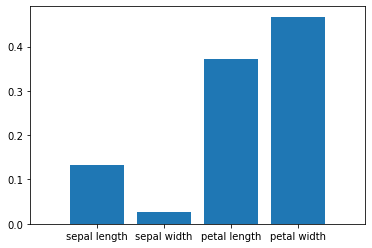

In [7]:
fig, ax = plt.subplots()

ax.bar(range(X_train.shape[1]), forest.feature_importances_)
ax.set_xlim([-1, X.shape[1]])
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(['sepal length', 'sepal width', 'petal length', 'petal width'])
plt.show()

### Feature Importance via Permutation

#### Permutation Test

- A nonparametric test procedure to test the null hypothesis that two different groups come from the same distribution
- Can be used for significance or hypothesis testing w/o requiring to make any assumptions about the sampling distribution (e.g., it doesn't require the samples to be normal distributed).
- Under the null hypothesis (treatment = control), any permutations are equally likely
- Note that there are $(n+m)!$ permutations, where $n$ is the number of records in the treatment sample, and $m$ is the number of records in the control sample
- For a two-sided test, we define the alternative hypothesis that the two samples are different (e.g., treatment != control)


#### Method

1. Compute the difference (eg: mean) of sample $x$ (size $n$) and sample $y$ (size $m$)
2. Combine all measurements into a single dataset
3. Draw a permuted dataset from all possible permutations of the dataset in 2.
4. Divide the permuted dataset into two datasets $x'$ and $y'$ of size $n$ and $m$, respectively
5. Compute the difference (eg: mean) of sample $x'$ and sample $y'$ and record this difference
6. Repeat steps 3-5 until all permutations are evaluated
7. Return the **p-value** as the number of times the recorded differences were more extreme than the original difference from 1., then divide this number by the total number of permutations

Here, the **p-value** is defined as the **probability, given the null hypothesis (no difference between the samples) is true, that we obtain results that are at least as extreme as the results we observed (i.e., the sample difference from step 1).**

$$ p(t > t_0) = \frac{1}{(n+m)!} \sum_{j=1}^{(n+m)!} I(t_j > t_0) $$

where $t_0$ is the observed value of the test statistic, and $t$ is the t-value, the statistic computed from the resamples and I is the Indicator function.

#### Mlxtend Wrapper for Feature Importance via Permutation

[http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/](http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/)

1. Take a model that was fit to the training set
2. Estimate the predictive performance of the model on an independent dataset (e.g., validation dataset) and record it as the baseline performance
3. For each feature i:
    - randomly permute feature column i in the original dataset
    - record the predictive performance of the model on the dataset with the permuted column
    - compute the feature importance as the difference between the baseline performance (step 2) and the performance on the permuted dataset
    - Repeat this loop exhaustively (all combinations) or a large number of times and compute the feature importance as the average difference
    
#### Column drop variant
For each feature column i:
1. temporarily remove column
2. fit model to reduced dataset
3. compute validation set performance and compare to before


In [8]:
from mlxtend.evaluate import feature_importance_permutation

imp_vals, _ = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=100,
    seed=1)

imp_vals

array([0.        , 0.        , 0.10078947, 0.13763158])

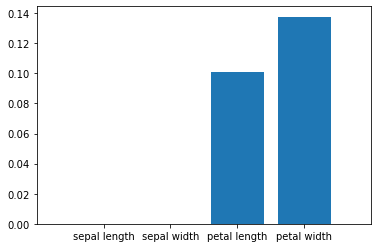

In [9]:
fig, ax = plt.subplots()

ax.bar(range(X_train.shape[1]), imp_vals)
ax.set_xlim([-1, X.shape[1]])
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(['sepal length', 'sepal width', 'petal length', 'petal width'])
plt.show()

<!-- ### Random Forest Feature Importance "Method B"

#### Out-of-bag accuracy:
- During training, for each tree, make prediction for OOB sample (~1/3 of the training data)
- Based on those predictions where feature i was OOB, compute label via majority vote among the trees that did not use feature i during model fitting
- The proportion over all examples where the prediction (by majority vote) is correct is the OOB accuracy estimate

#### Out-of-bag feature importance via permutation:
- Count votes for correct class
- Given feature i, permute this feature in OOB examples of a tree
- Compute the number of correct votes after permutation from the number of votes before permutation for given tree
- Repeat for all trees in the random forest and average the importance - Repeat for other features -->

### Extremely Randomised Trees (ExtraTrees)

Compared to regular random forests, the ExtraTrees algorithm selects a random feature at each decision tree nodes for splitting; hence, it is very fast because there is no information gain computation and feature comparison step.

Intuitively, one might say that ExtraTrees have another “random component” (compared to random forests) to further reduce the correlation among trees – however, it might decrease the strength of the individual trees.

In [10]:
from sklearn.ensemble import ExtraTreesClassifier


forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=1)

forest.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % forest.score(X_test, y_test))

Test Accuracy: 0.97


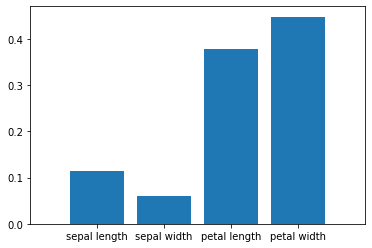

In [11]:
fig, ax = plt.subplots()

ax.bar(range(X_train.shape[1]), forest.feature_importances_)
ax.set_xlim([-1, X.shape[1]])
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(['sepal length', 'sepal width', 'petal length', 'petal width'])
plt.show()